# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [2]:
##### Your Code Here #####
# import libraries
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# set pandas view options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [3]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url)
print(df.shape)
df.describe().T




(1460, 81)


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


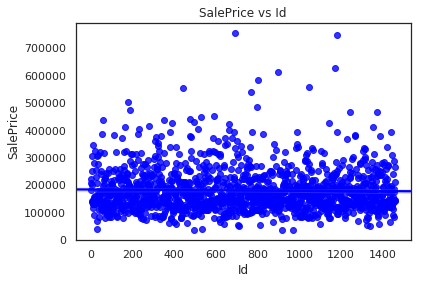

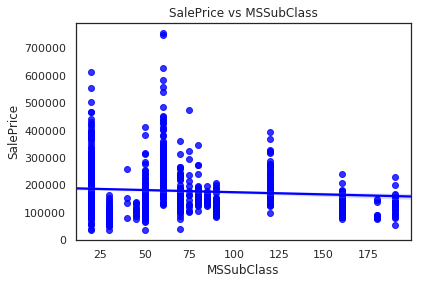

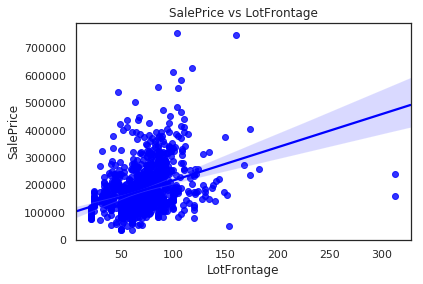

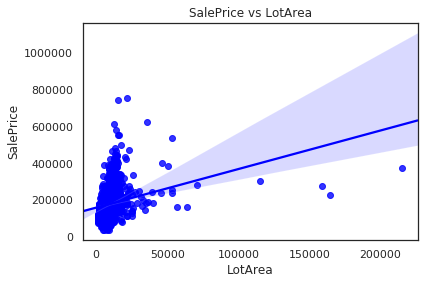

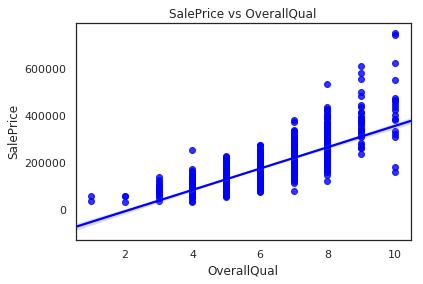

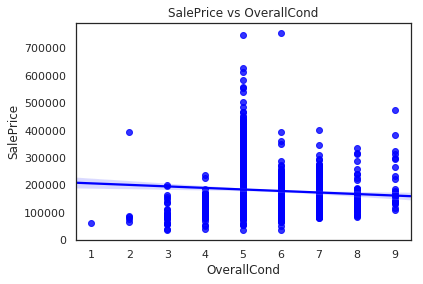

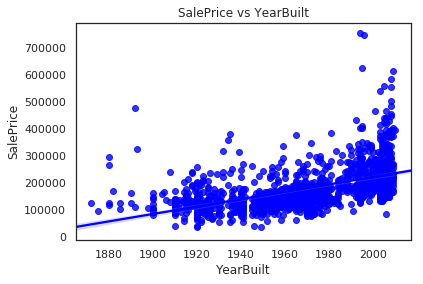

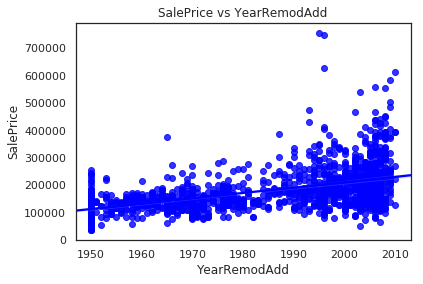

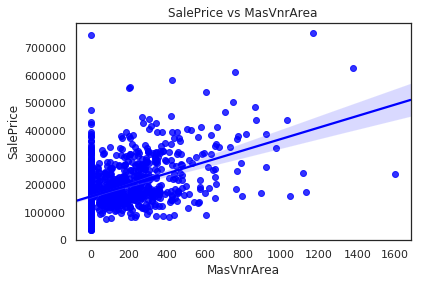

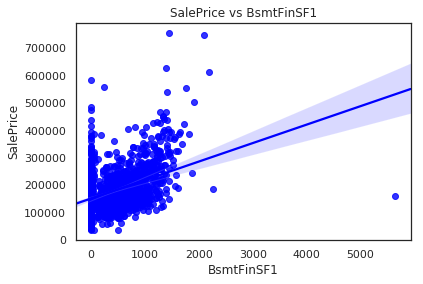

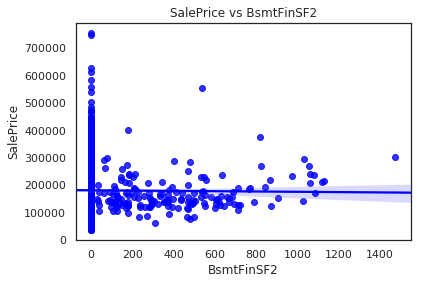

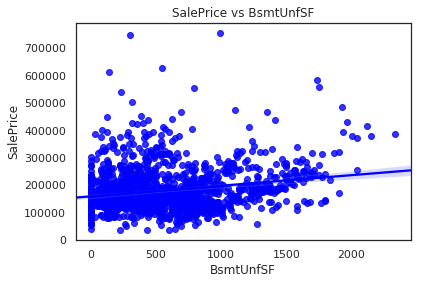

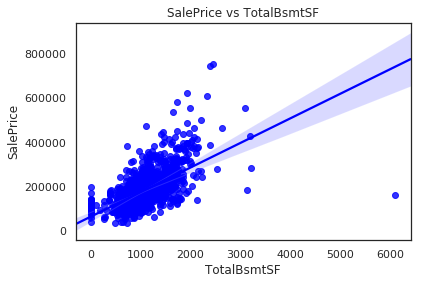

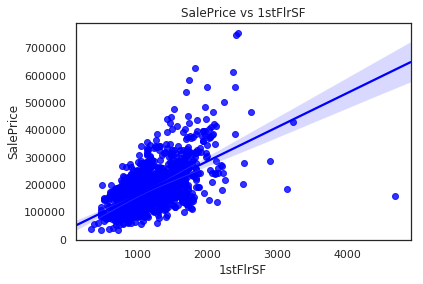

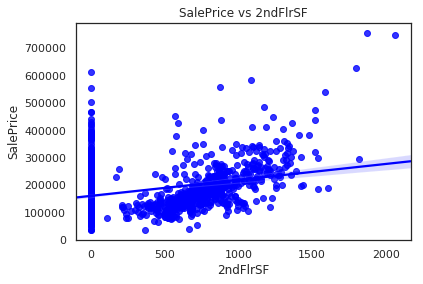

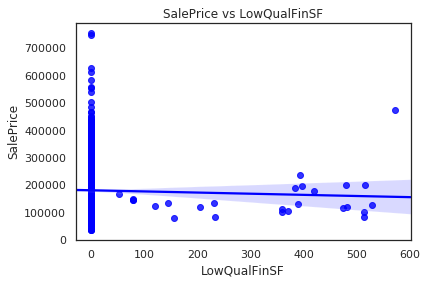

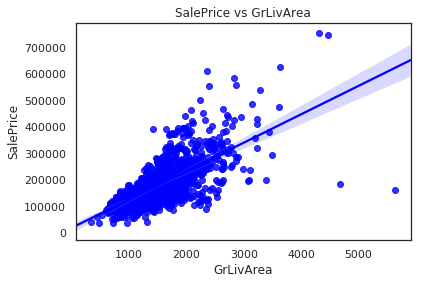

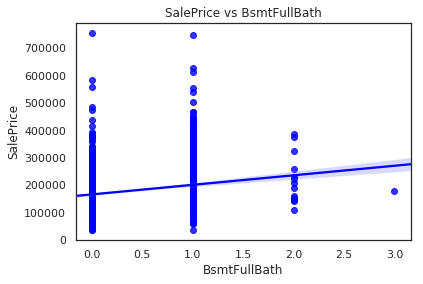

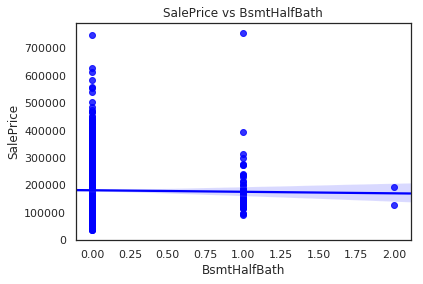

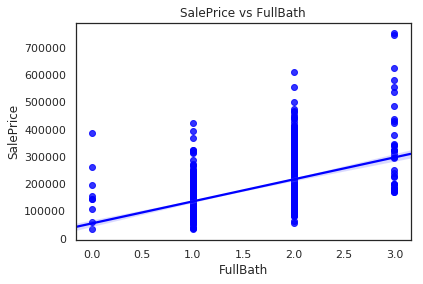

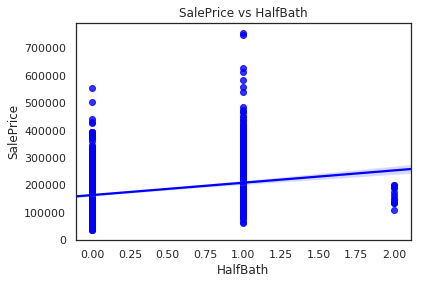

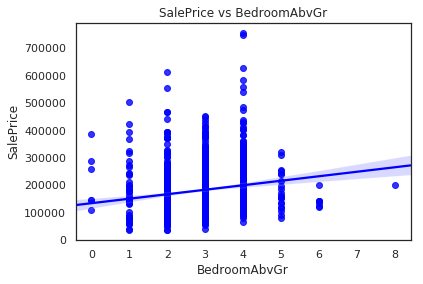

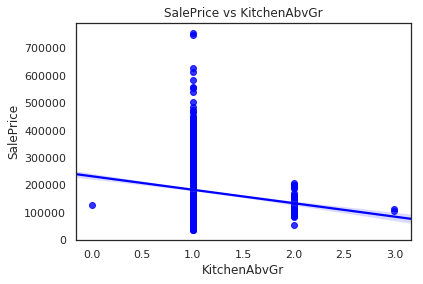

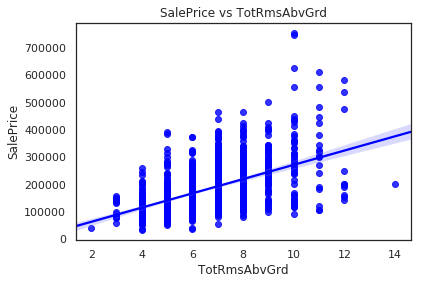

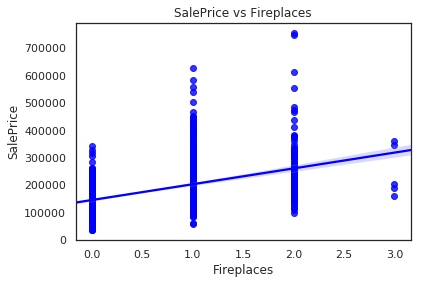

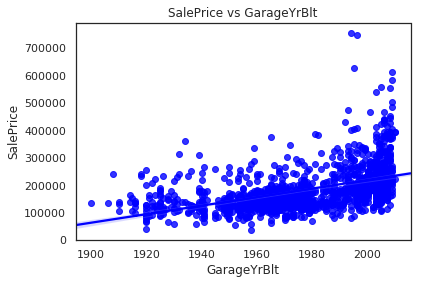

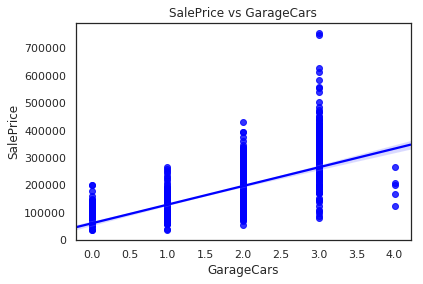

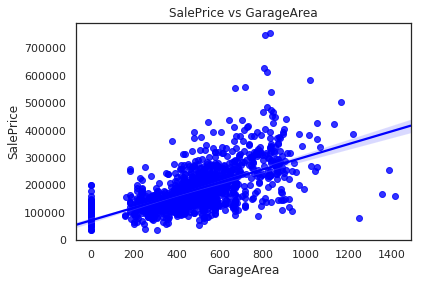

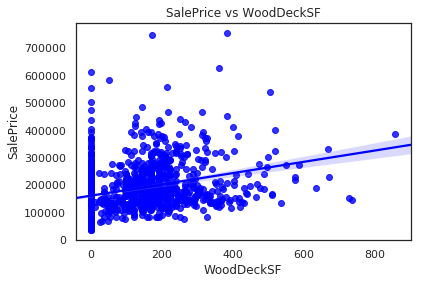

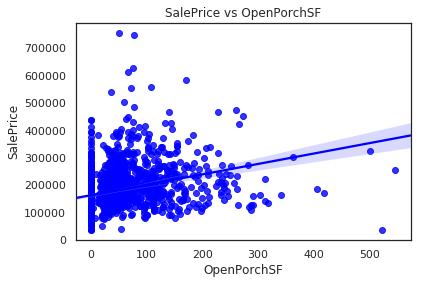

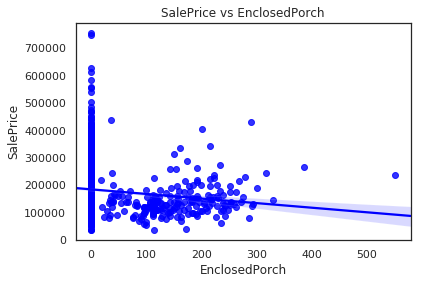

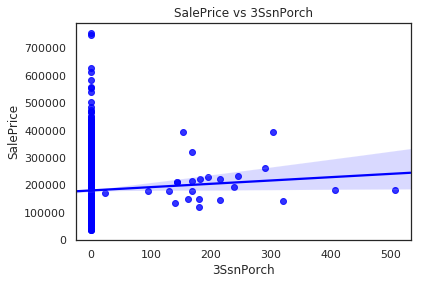

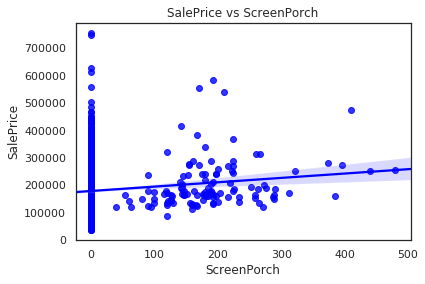

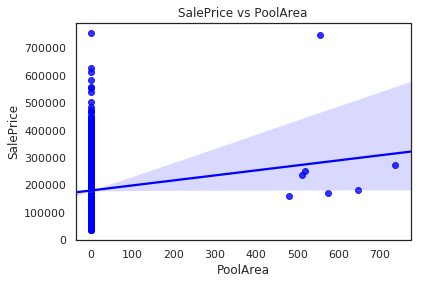

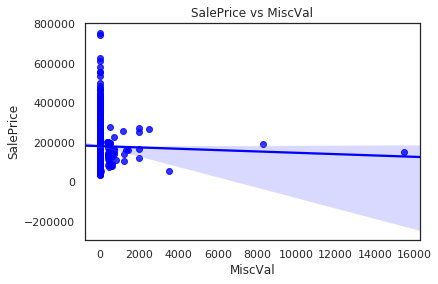

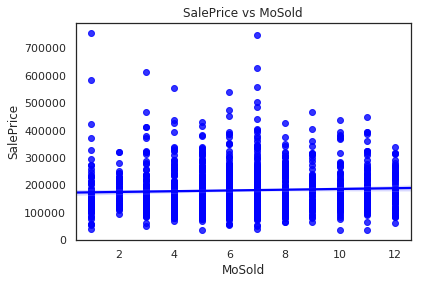

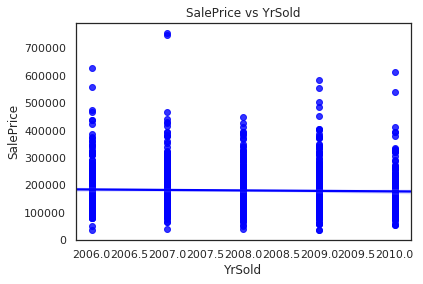

In [60]:
# I'm just going to run them all to find one I like

for col in df.select_dtypes(include='number').drop(columns='SalePrice').columns.tolist():
    sns.regplot(df[col], df['SalePrice'], color='blue').set_title('SalePrice vs ' + col);
    plt.show()
    

In [4]:
# I'm going to clean my data now:

# drop columns that seem unimportant and NaNy

df = df.drop(['BsmtQual', 'BsmtCond', 
              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish',
             'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1)

# fill with 0s because these categories probably mean 0 instead of nan
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['Alley'] = df['Alley'].fillna(0)


In [5]:
# and encode categorical variables
# this is a dataset where all cats are endcoded, thanks Daniel!
df_coded=df.copy()
for col in df_coded.columns:
  if df_coded[col].dtype=='O':
    df_coded[col] = pd.Categorical(df_coded[col])
    df_coded[col] = df_coded[col].cat.codes
    
# resolve a float64 error with Linear Regression
df_coded = df_coded.fillna(value=0)
for col in df_coded.columns:
  if df_coded[col].dtype=='float64':
    df_coded[col] = (df_coded[col]).astype(np.int64)

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [71]:
##### Your Code Here #####
# first I'll check the columns
print(df_coded.head())
print(df_coded.isna().sum())

   MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3           65     8450       1      0         3   
1          20         3           80     9600       1      0         3   
2          60         3           68    11250       1      0         0   
3          70         3           60     9550       1      0         0   
4          60         3           84    14260       1      0         0   

   LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            3          0          4  ...              0          0   
1            3          0          2  ...              0          0   
2            3          0          4  ...              0          0   
3            3          0          0  ...            272          0   
4            3          0          2  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008 

In [1]:
# they look ok so I'll add my target variables, I think that house condition, age, and size are important

target = 'SalePrice'

features = ['SaleType', 'SaleCondition', 'GrLivArea', 
            'OverallCond', 'OverallQual', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF']


X = df_coded[features]
y = df_coded[target]

NameError: name 'df' is not defined

In [76]:
# statsmodels for regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     492.4
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        13:13:32   Log-Likelihood:                -17463.
No. Observations:                1460   AIC:                         3.495e+04
Df Residuals:                    1449   BIC:                         3.501e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.617e+04    1.3e+04     -3.565

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

My interpretation is that the std errors are relatively small, except for saleType and ExterCond. 

P values are small so coefficents should be significant. Also, my 95% CI spans zero for SaleType so the model does not necessarily identify the correct direction of the slope of coefficients.



## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [78]:
##### Your Code Here #####

# remove outliers

df_coded = df_coded[(np.abs(stats.zscore(df_coded)) < 3).all(axis=1)]

target = 'SalePrice'

features = ['SaleType', 'SaleCondition', 'GrLivArea', 
            'OverallCond', 'OverallQual', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF']

X = df_coded[features]
y = df_coded[target]
# statsmodels for regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     337.4
Date:                Wed, 01 May 2019   Prob (F-statistic):          1.34e-248
Time:                        13:15:51   Log-Likelihood:                -7537.8
No. Observations:                 656   AIC:                         1.510e+04
Df Residuals:                     645   BIC:                         1.515e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.298e+05   3.41e+04     -3.805

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


std error has risen for saletype, and salecondition, and grlivarea, actually, every stand err has rissen, but the p value of neighborhood fell.


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [79]:
##### Your Code Here #####
df_coded['ln_price'] = np.log(df_coded['SalePrice'])

target = 'ln_price'

features = ['SaleType', 'SaleCondition', 'GrLivArea', 
            'OverallCond', 'OverallQual', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF']


X = df_coded[features]
y = df_coded[target]

# statsmodels for regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 01 May 2019   Prob (F-statistic):          6.37e-257
Time:                        13:27:37   Log-Likelihood:                 434.22
No. Observations:                 656   AIC:                            -846.4
Df Residuals:                     645   BIC:                            -797.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.3147      0.180     57.338

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [80]:
##### Your Code Here #####
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor((sm.add_constant(X)).values, i) for i in range(len(X.columns))]

pd.Series(vif, X.columns)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


SaleType         1339.673304
SaleCondition       2.245001
GrLivArea           2.306547
OverallCond         1.925292
OverallQual         1.276036
Neighborhood        2.838910
ExterQual           1.055486
ExterCond           2.013355
Fireplaces          1.144293
TotalBsmtSF         1.312048
dtype: float64

In [81]:
# ok, Saletype has a huge VIF

target = 'ln_price'

features = ['SaleCondition', 'GrLivArea', 
            'OverallCond', 'OverallQual', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF']


X = df_coded[features]
y = df_coded[target]

# statsmodels for regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     402.4
Date:                Wed, 01 May 2019   Prob (F-statistic):          4.30e-258
Time:                        13:29:16   Log-Likelihood:                 433.88
No. Observations:                 656   AIC:                            -847.8
Df Residuals:                     646   BIC:                            -802.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.4322      0.107     97.189

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


omitting SaleType reduced the stderr for SaleCondition from .024 to .016

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [82]:
##### Your Code Here #####

target = 'ln_price'

features = ['SaleCondition', 'GrLivArea', 
            'OverallCond', 'OverallQual', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF']

X = df_coded[features]
y = df_coded[target]

X.corr()

,SaleCondition,GrLivArea,OverallCond,OverallQual,Neighborhood,ExterQual,ExterCond,Fireplaces,TotalBsmtSF
SaleCondition,1.000000,0.118443,-0.151258,0.254381,0.031443,-0.275895,0.096655,0.011236,0.219856
GrLivArea,0.118443,1.000000,-0.233177,0.641858,0.079680,-0.455326,0.099380,0.461595,0.325019
OverallCond,-0.151258,-0.233177,1.000000,-0.342186,0.041355,0.328049,-0.339922,-0.120301,-0.215234
OverallQual,0.254381,0.641858,-0.342186,1.000000,0.060473,-0.679249,0.185761,0.352018,0.499818
Neighborhood,0.031443,0.079680,0.041355,0.060473,1.000000,0.026706,-0.048689,0.105452,0.163119
ExterQual,-0.275895,-0.455326,0.328049,-0.679249,0.026706,1.000000,-0.147664,-0.172288,-0.419263
ExterCond,0.096655,0.099380,-0.339922,0.185761,-0.048689,-0.147664,1.000000,0.036659,0.087192
Fireplaces,0.011236,0.461595,-0.120301,0.352018,0.105452,-0.172288,0.036659,1.000000,0.198276
TotalBsmtSF,0.219856,0.325019,-0.215234,0.499818,0.163119,-0.419263,0.087192,0.198276,1.000000


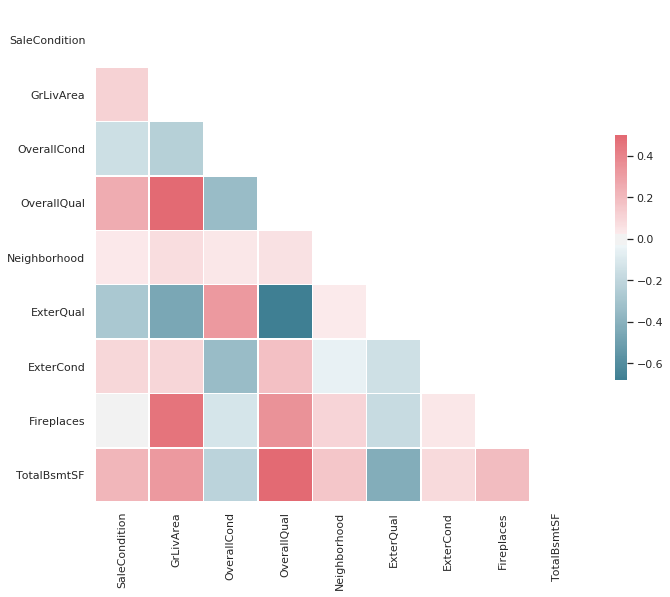

In [83]:
# we can also plot this, thanks Ryan!

sns.set(style='white')

# correlation matrix
corr = X.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# matplot figure
f, ax = plt.subplots(figsize=(11,9));

# generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# draw heatmap with mask and aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink': .5});

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [84]:
##### Your Code Here #####
# I'm going to try to remove OverallQual but I don't think it's a good idea



target = 'ln_price'

features = ['SaleCondition', 'GrLivArea', 
            'OverallCond', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF']


X = df_coded[features]
y = df_coded[target]


# statsmodels for regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     341.9
Date:                Wed, 01 May 2019   Prob (F-statistic):          1.28e-226
Time:                        13:33:28   Log-Likelihood:                 357.12
No. Observations:                 656   AIC:                            -696.2
Df Residuals:                     647   BIC:                            -655.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.9312      0.113     97.026

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


STDerror actually increases a little, weird, not going to keep this change.

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [85]:
##### Your Code Here #####
target = 'ln_price'

features = ['SaleCondition', 'GrLivArea', 
            'OverallCond', 'OverallQual', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF']

X = df_coded[features]
y = df_coded[target]

# statsmodels for regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     363.2
Date:                Wed, 01 May 2019   Prob (F-statistic):          5.34e-246
Time:                        13:34:37   Log-Likelihood:                 433.88
No. Observations:                 656   AIC:                            -847.8
Df Residuals:                     646   BIC:                            -802.9
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.4322      0.143     72.991

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


Interesting, stderr increases for SaleCondition and GrLivArea, but falls for everything else (or remains neutral).

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

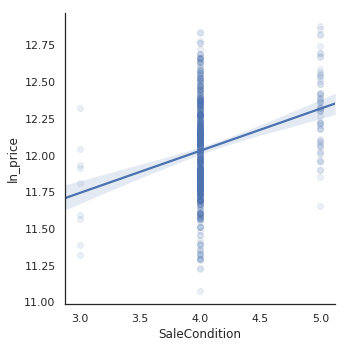

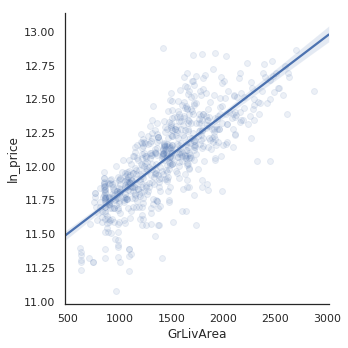

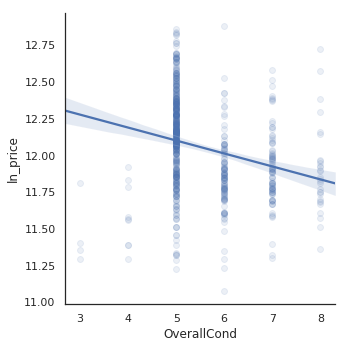

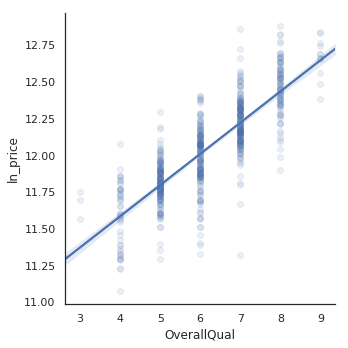

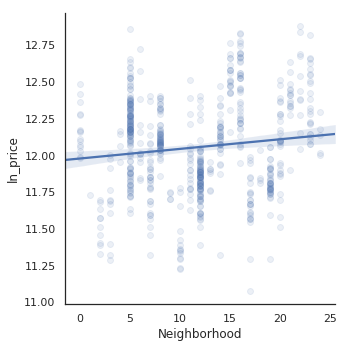

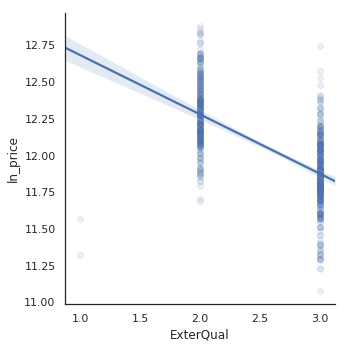

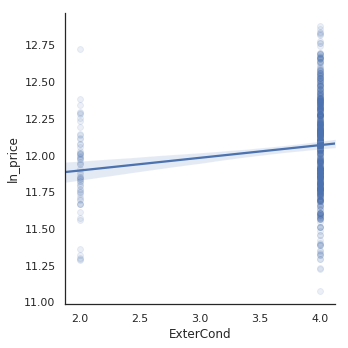

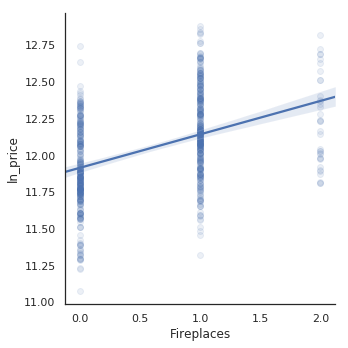

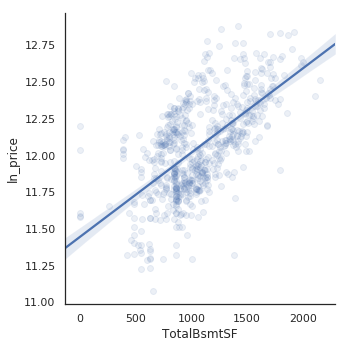

In [87]:
##### Your Code Here #####
target = 'ln_price'

for feature in features:
    sns.lmplot(x=feature, y=target, data=df_coded, scatter_kws=dict(alpha=0.1))

I think GrLivArea and TotalBsmtSF might want to be polynomial

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


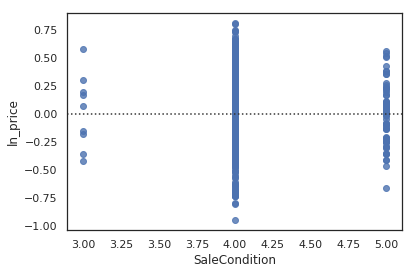

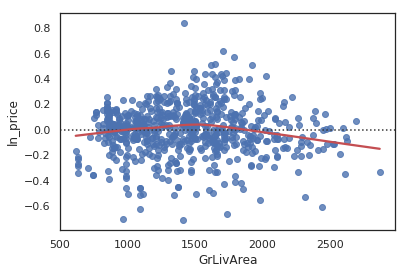

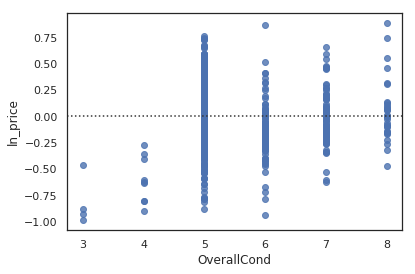

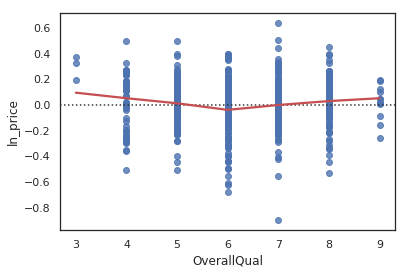

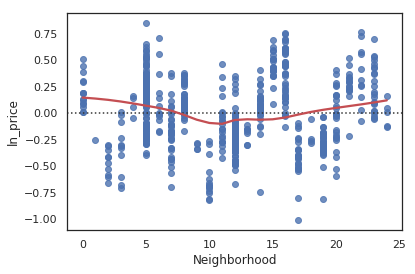

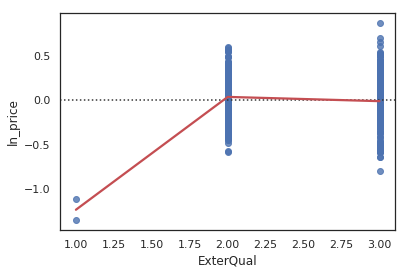

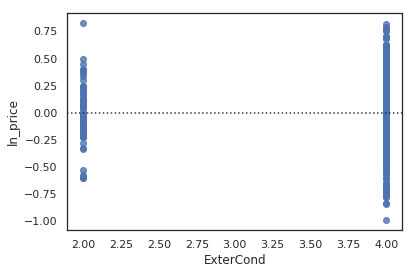

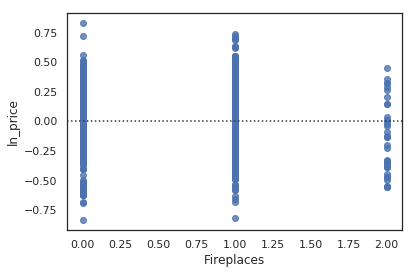

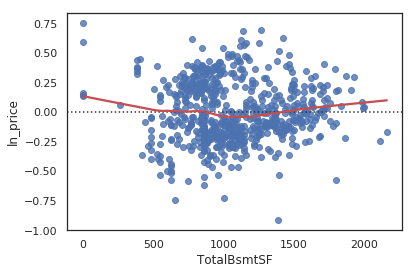

In [89]:
##### Your Code Here #####

for feature in features:
    sns.residplot(X[feature],y, lowess=True, line_kws=dict(color='r'))
    plt.show();

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [90]:
##### Your Code Here #####

poly = ['TotalBsmtSF','ExterQual','Neighborhood','OverallQual','GrLivArea']

for feature in poly:
    df_coded[feature + '_squared'] = df_coded[feature] ** 2

df_coded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_price,TotalBsmtSF_squared,ExterQual_squared,Neighborhood_squared,OverallQual_squared,GrLivArea_squared
0,60,3,65,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196,2,4,2,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500,12.247694,732736,4,25,49,2924100
2,60,3,68,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162,2,4,2,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500,12.317167,846400,4,25,49,3189796
4,60,3,84,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350,2,4,2,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000,12.429216,1311025,4,-31,64,4831204
6,20,3,75,10084,1,0,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186,2,4,2,1369,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,636,2,255,57,0,0,0,0,0,8,2007,8,4,307000,12.634603,2842596,4,-71,64,2869636
10,20,3,70,11200,1,0,3,3,0,4,0,19,2,2,0,2,5,5,1965,1965,3,1,6,6,2,0,3,4,1,906,0,134,1040,1,0,1,4,1040,0,0,1040,1,0,1,0,3,1,3,5,6,0,1,384,2,0,0,0,0,0,0,0,2,2008,8,4,129500,11.771436,1081600,9,105,25,1081600


In [91]:
##### Your Code Here #####
target = 'ln_price'

features = ['SaleCondition', 'GrLivArea', 
            'OverallCond', 'OverallQual', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF',
           'TotalBsmtSF_squared', 'ExterQual_squared', 'Neighborhood_squared', 'OverallQual_squared',
           'GrLivArea_squared']

X = df_coded[features]
y = df_coded[target]

# statsmodels for regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     73.68
Date:                Wed, 01 May 2019   Prob (F-statistic):          4.34e-112
Time:                        13:45:31   Log-Likelihood:                 445.50
No. Observations:                 656   AIC:                            -861.0
Df Residuals:                     641   BIC:                            -793.7
Df Model:                          14                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.4036 

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 12
  'rank is %d' % (J, J_), ValueWarning)


STD errors have risen, so I think that making the categorical varibles polynomial may have backfired, I'll try a more conservative feature list

In [92]:
##### Your Code Here #####
target = 'ln_price'

features = ['SaleCondition', 'GrLivArea', 
            'OverallCond', 'OverallQual', 'Neighborhood', 
            'ExterQual', 'ExterCond', 'Fireplaces', 'TotalBsmtSF',
           'TotalBsmtSF_squared', 'GrLivArea_squared']

X = df_coded[features]
y = df_coded[target]

# statsmodels for regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     307.2
Date:                Wed, 01 May 2019   Prob (F-statistic):          1.08e-247
Time:                        13:47:17   Log-Likelihood:                 437.97
No. Observations:                 656   AIC:                            -851.9
Df Residuals:                     644   BIC:                            -798.1
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.2725    

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


Weird, so STD error increased but by very small amounts, as did the weighted coeficiants of the model. The GrLivArea squared variable also has a 95% CI that spans the origin so it is likely a bad regressor. I suspect that increases in R2 are now due to overfitting.

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.